Dieses Teil unseres Berichtes wird aus zwei Teilen besthen. Nämlich Preisvorhersage und Klassifikation basierend auf die Marke.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("bereinigten_deutsch_daten.csv")

In [ ]:
df_ = pd.read_csv("bereinigung_deutsch.csv")

In [ ]:
df

10000

In [ ]:
df_

,Unnamed: 0,Marke,Serie,Modell,Kilometer,Getriebetyp,Kraftstoffart,Karosserieart,Farbe,Motorhubraum,Motorleistung,Antrieb,Durchschnittlicher Kraftstoffverbrauch,Kraftstofftank,Lackwechsel,Preis,Alter
0,1,Audi,A6,A6 Sedan 2.0 TDI,337000,Otomatik,Dizel,Sedan,Gri (Gümüş),1968,136,Önden Çekiş,5.8,70.0,3 boyalı,749000,14
1,2,Audi,A6,A6 Sedan 2.0 TDI,145000,Yarı Otomatik,Dizel,Sedan,Beyaz,1968,190,Önden Çekiş,4.4,65.0,Tamamı orjinal,1975000,8
2,3,Audi,A3,A3 Sportback 1.0 TFSI Dynamic,76000,Yarı Otomatik,Benzin,Hatchback/5,Beyaz,999,116,Önden Çekiş,4.5,50.0,Tamamı orjinal,1145000,6
3,4,Audi,A3,A3 Sedan 1.6 TDI Dynamic,139000,Yarı Otomatik,Dizel,Sedan,Siyah,1598,110,Önden Çekiş,3.7,50.0,Belirtilmemiş,995000,7
4,5,Audi,A3,A3 Sedan 30 TFSI Dynamic,83400,Yarı Otomatik,Benzin,Sedan,Mavi (metalik),999,116,Önden Çekiş,4.4,50.0,Tamamı orjinal,1250000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29541,30601,Volkswagen,Golf,1.6 TDi BlueMotion Comfortline,182000,Düz,Dizel,Hatchback/5,Beyaz,1598,90,Önden Çekiş,5.6,52.7,Tamamı orjinal,825000,8
29542,30735,Volkswagen,Golf,1.6 TDi BlueMotion Midline Plus,193000,Düz,Dizel,Hatchback/5,Beyaz,1598,90,Önden Çekiş,5.6,52.7,Belirtilmemiş,750000,9
29543,30793,Volkswagen,Polo,1.0 Impression,6001,Düz,Benzin,Hatchback/5,Beyaz,1598,90,Önden Çekiş,5.6,52.7,Tamamı orjinal,800000,0
29544,30799,Volkswagen,Polo,1.6,335000,Düz,LPG & Benzin,Hatchback/5,Beyaz,1598,90,Önden Çekiş,5.6,52.7,1 değişen,275000,25


## Umkehr Operatiton des Min-Max-Scalers

In [ ]:
#Funktion zur Umkehrung des Min-Max-Scaling-Prozesses
def inverse_min_max_scaler(scaled_val):
    #Bestimmung von Maximal- und Minimalwerten aus der Originalspalte
    #'Preis' des Datensatzes 'df_'
    max_val = max(df_['Preis'])
    min_val = min(df_['Preis'])

    #Durchführung der inversen Transformation
    og_val = (scaled_val * (max_val - min_val)) + min_val

    return og_val


Diese Funktion, inverse_min_max_scaler, dient zur Umkehrung des Min-Max-Skalierungsprozesses. Das Min-Max-Skalieren ist eine gängige Methode in der Datenpräparation und wird verwendet, um Werte auf einen festgelegten Wertebereich zu skalieren, normalerweise zwischen 0 und 1.



Die Umkehrung des Min-Max-Skalierungsprozesses ist wichtig, da sie es ermöglicht, skalierte Werte wieder in ihre ursprüngliche Skala zu bringen. Dies kann in verschiedenen Anwendungen nützlich sein, insbesondere wenn man maschinelles Lernen verwendet und die Daten vor der Modellanpassung auf einen bestimmten Bereich skaliert wurden. Durch die Umkehrung können die Vorhersagen des Modells in den ursprünglichen Wertebereich zurücktransformiert werden.

Um diese Funktion zu nutzen, muss lediglich der skalierte Wert (scaled_val) als Argument übergeben werden. Sie gibt dann den ursprünglichen Wert zurück, der vor der Skalierung vorhanden war. Es ist wichtig zu beachten, dass für eine korrekte Umkehrung die gleichen Min- und Max-Werte verwendet werden müssen, die für die ursprüngliche Skalierung verwendet wurde






## Principle Component Analysis

Der PCA ist ein Verfahren zur Dimensionsreduktion, das in Machine-Learning- und Datenanalyseanwendungen weit verbreitet ist. Indem er die Hauptkomponenten extrahiert, kann PCA dazu verwendet werden, die Dimensionalität der Daten zu verringern, indem weniger relevante Informationen entfernt werden, während die wichtigsten Muster und Informationen beibehalten werden.

Text(0, 0.5, 'Explained Variance')

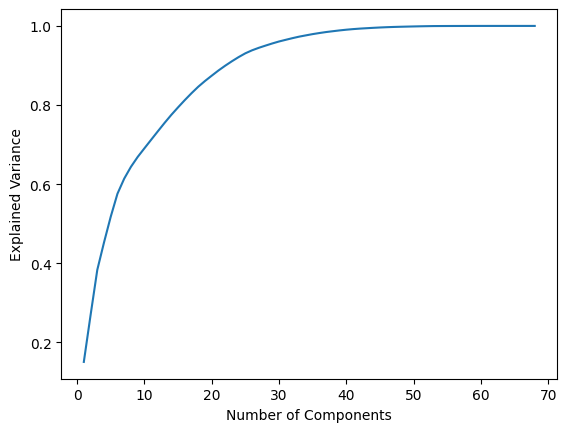

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=68)
X = pca.fit_transform(df.drop(['Preis',"Marke"], axis=1))
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

Text(0, 0.5, 'Explained Variance')

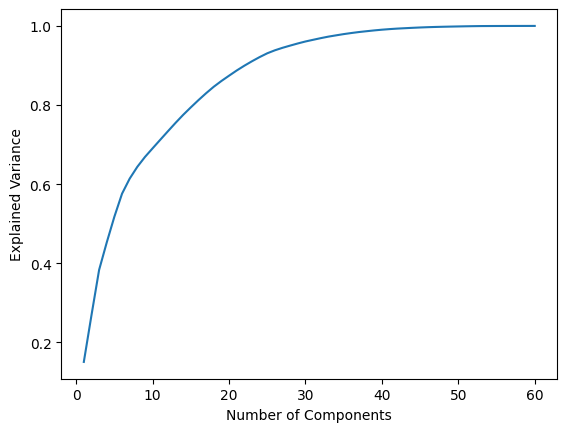

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=60)
X = pca.fit_transform(df.drop(['Preis',"Marke"], axis=1))
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

Der Code führt PCA mit einer Anzahl von Hauptkomponenten (n_components) durch, die 68 und dann 60 beträgt. Anschließend wird die kumulative erklärte Varianz über die Anzahl der Hauptkomponenten geplottet, um zu zeigen, wie viel Varianz in den Daten von den ersten n Hauptkomponenten erklärt wird.

Die kumulative erklärte Varianz wird normalerweise verwendet, um zu entscheiden, wie viele Hauptkomponenten beibehalten werden sollen. Ein häufiges Kriterium ist es, genügend Hauptkomponenten zu behalten, um einen hohen Prozentsatz der Gesamtvarianz zu erklären, beispielsweise 95 % oder mehr.

Die geplotteten Linien zeigen, wie die kumulative erklärte Varianz mit der Anzahl der Hauptkomponenten steigt. Der Punkt, an dem die Kurve einen "Ellenbogen" bildet, dient als Hinweis darauf, wie viele Hauptkomponenten ausreichen, um einen Großteil der Varianz zu erfassen, ohne zu viele Dimensionen beizubehalten.

In unserem Code wird der PCA zweimal ausgeführt und zwei separate Plots werden erstellt, um die Auswirkungen von 68 und 60 Hauptkomponenten zu vergleichen. Dann wird entshiden das Linear Regression Model mit 60 Komponenten zu tranieren.

## Linear Regression

In [ ]:
 from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pca = PCA(n_components=60)
X = pca.fit_transform(df.drop(['Preis',"Marke"], axis=1))
# Daten vorbereiten
data = df.drop("Marke", axis=1) #Entferne die Spalte 'Marka' aus dem Datensatz
X = X #df.drop(['Preis',"Marke"], axis=1)  # Feature-Variablen (unabhängige Variablen)
y = df['Preis']                # Zielvariable (abhängige Variable)

# Daten in Trainings- und Testsets aufteilen
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear Regression Modell erstellen
linear_reg = LinearRegression()

# Modell trainieren
linear_reg.fit(X_train, y_train)

# Vorhersagen für das Testset treffen
y_pred = linear_reg.predict(X_test)

# Bewertung des Modells
mse = mean_squared_error(y_test, y_pred)  # Berechne den Mean Squared Error
r2 = r2_score(y_test, y_pred)            # Berechne den R-squared Score

# Ergebnisse ausgeben
print(f"Root Mean Squared Error (RMSE): {inverse_min_max_scaler(np.sqrt(mse)):.2f}")  # Ausgabe des MSE
print(f"R-squared (R2): {r2:.4f}")            # Ausgabe des R2-Scores

Root Mean Squared Error (RMSE): 195861.43
R-squared (R2): 0.7874


Der Code demonstriert den Prozess des Trainierens eines linearen Regressionsmodells nach Anwendung der Principal Component Analysis (PCA) auf die Daten.

Zunächst wird PCA mit 60 Hauptkomponenten auf den DataFrame df angewendet, um die Feature-Variablen zu transformieren und die Dimensionalität zu reduzieren.

Die Daten werden vorbereitet wo die Spalte 'Marke' aus dem Datensatz entfernt wird, und die abhängige Variable 'Preis' wird als Zielvariable (y) festgelegt.

Die Daten werden in Trainings- und Testsets aufgeteilt. Die unabhängigen Variablen (X) und die Zielvariable (y) werden entsprechend aufgeteilt.

Ein lineares Regressionsmodell wird erstellt (linear_reg = LinearRegression()).

Das Modell wird auf den Trainingsdaten trainiert (linear_reg.fit(X_train, y_train)).

Das trainierte Modell wird verwendet, um Vorhersagen für das Testset zu generieren (y_pred = linear_reg.predict(X_test)).

Das Modell wird anhand der Metriken Mean Squared Error (MSE) und R-squared Score (R2) ausgewertet.

Die Ergebnisse werden ausgegeben wobei der Root Mean Squared Error (RMSE) wird unter Verwendung der Funktion inverse_min_max_scaler auf den Wurzel-MSE angewendet, um den RMSE im ursprünglichen Datenbereich zu erhalten. Außerdem wird der R2-Score ausgegeben.

Es ist wichtig zu beachten, dass die Ausgabe im aktuellen Code zeigt, dass der RMSE 195861.43 und der R2-Score 0.7874 beträgt.

Der RMSE von 195861.43 zeigt den Fehler des Modells in der Preisvorhersage an. Der RMSE gibt an, wie stark die Vorhersagen des Modells im Durchschnitt von den tatsächlichen Preisen abweichen. Ein niedrigerer RMSE deutet auf eine bessere Leistung des Modells hin  Dies bedeutet, dass die Vorhersage des Preises in diesem Modell durchschnittlich um 195861 türkische Lira abweicht, was kein gutes Ergebnis ist..




Der R2-Score von 0.7874 ist ein Maß dafür, wie gut die unabhängigen Variablen die Abhängige erklären. Ein R2-Score von 1 wäre perfekt, während ein Score von 0 oder niedriger darauf hinweist, dass das Modell nicht besser als eine einfache Durchschnittsprognose ist.

In [ ]:
columns_to_exclude = ['Alter', 'Kilometer', "Durchschnittlicher Kraftstoffverbrauch", "Motorleistung", "Motorhubraum", "Preis", "Marke"]

columns_not_included = df.columns[~df.columns.isin(columns_to_exclude)]

Da die OLS-Regression nur numpy-arrays für die Variablen akzeptiert, müssen wir sicherstellen, dass die Daten sauber separiert sind, um eine fehlerfreie Konvertierung zu gewährleisten. Kategorische und numerische Daten müssen separat behandelt werden, da die Funktion zur Konvertierung in numpy-arrays eine einheitliche Datenstruktur erwartet.

## OLS lineare Regressionsmodelle Mit Angepassten Parametern

Bevor wir uns für ein komplizierteres Modell entschieden haben, wollten wir feststellen, ob das Problem tatsächlich an der linearen Regression liegt. Aus diesem Grund wurde das OLS-Regressionsmodell traniert. Dieses OLS-Regressionsmodell (Ordinary Least Squares), das eine alternative Minimierungsfunktion namens „Least Squares“ für lineare Regression benutzt,

In [ ]:
import statsmodels.api as sm

# Auswahl der unabhängigen Variablen für die X-Matrix
X = np.array(df[['Alter', 'Kilometer', "Durchschnittlicher Kraftstoffverbrauch", "Motorleistung", "Motorhubraum"]])

# Auswahl der restlichen Spalten, die nicht in X enthalten sind

x_ = np.array(df[columns_not_included])

# Verkettung von X und x_ zu einer X-Matrix
X = concatenated_array = np.hstack((X, x_))

# Abhängige Variable (Zielvariable)
y = np.array(df["Preis"])

# Train the linear regression model on the training data
model = sm.OLS(y, X).fit()

# Summary of the trained model
model_summary = model.summary()

# Output the model summary
print(model_summary)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     1715.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):               0.00
Time:                        01:14:38   Log-Likelihood:                 41767.
No. Observations:               29546   AIC:                        -8.341e+04
Df Residuals:                   29484   BIC:                        -8.290e+04
Df Model:                          61                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.4494      0.004   -119.823      0.0

Das Modell zeigt einen R-Quadrat-Wert von 0,78 an, was darauf hinweist, dass etwa 78 % der Varianz in der abhängigen Variablen durch das Modell erklärt werden.. Der Grund, warum wir dieses Modell traniert haben, liegt darin, dass wir die Dimensionen weiter reduzieren möchten, die mit PCA reduziert wurden, indem wir die t-Werte und p-Werte analysieren. Das Modell umfasst zahlreiche Prädiktoren (x1 bis x67) mit unterschiedlichen Koeffizienten. Einige Prädiktoren zeigen statistisch signifikante Effekte (mit p-Werten < 0,05), während viele andere nicht signifikant zu sein scheinen (hohe p-Werte). Darüber hinaus gibt es Anomalien wie übermäßig große oder kleine Koeffizienten, die auf Probleme wie numerische Probleme oder Datenanomalien hinweisen können. Durch diese Ergebnisse haben wir festgestellt, dass die Merkmalen „Farbe“ und „Kraftstoffart“ keinen signifikanten Einfluss auf unser Modell haben.

In [ ]:
# Importieren der benötigten Bibliotheken
import statsmodels.api as sm
import numpy as np

# Auswahl der kategorialen Features für X ohne "Farbe" und "Kraftstoffart" (unabhängige Variablen)
X = np.array(df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
                 'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3', 'Karosserieart_MPV',
        'Karosserieart_Roadster', 'Karosserieart_SUV', 'Karosserieart_Sedan',
       'Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Marke_Audi', 'Marke_BMW', 'Marke_Citroen',
       'Marke_Fiat', 'Marke_Ford', 'Marke_Honda', 'Marke_Hyundai',
       'Marke_Mercedes - Benz', 'Marke_Opel', 'Marke_Peugeot', 'Marke_Seat',
       'Marke_Skoda', 'Marke_Toyota', 'Marke_Volkswagen']])

pca = PCA(n_components=24)
X = pca.fit_transform(X)
X = np.array(X)

# Auswahl der numerischen Features für x_ (unabhängige Variablen)
x_ = np.array(df[['Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum']])

# Zusammenführen der kategorialen und numerischen Features zu einer kombinierten Feature-Matrix X
X = concatenated_array = np.hstack((X, x_))

# Auswahl der Zielvariable y (abhängige Variable)
y = np.array(df["Preis"])

# Anpassen eines linearen Regressionsmodells mit OLS (Ordinary Least Squares)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the linear regression model on the training data
model = sm.OLS(y_train, X_train).fit()

# Summary of the trained model
model_summary = model.summary()

# Output the model summary
print(model_summary)

predictions = model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f"R-squared value on test set: {r2}")

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.910
Model:                            OLS   Adj. R-squared (uncentered):              0.910
Method:                 Least Squares   F-statistic:                              8204.
Date:                Sun, 07 Jan 2024   Prob (F-statistic):                        0.00
Time:                        01:27:23   Log-Likelihood:                          27578.
No. Observations:               23636   AIC:                                 -5.510e+04
Df Residuals:                   23607   BIC:                                 -5.486e+04
Df Model:                          29                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Die Ergebnisse der OLS-Regression zeigen, dass das Modell insgesamt eine hohe Leistung aufweist, da das unzentrierte R-Quadrat 0,910 beträgt, was darauf hinweist, dass etwa 91 % der Varianz in der abhängigen Variablen durch die im Modell enthaltenen unabhängigen Variablen erklärt werden.

Das Modell enthält 29 unabhängige Variablen (x1 bis x29), von denen einige signifikante Koeffizienten aufweisen, die einen statistisch bedeutsamen Einfluss auf die abhängige Variable haben. Diese signifikanten Variablen tragen positiv (x1, x2, x3, x4, x9, x10, x12, x15, x16, x18, x19, x20, x27, x29) oder negativ (x7, x8, x11, x13, x14, x17, x22, x23, x24, x25, x26) zur abhängigen Variablen be

Zusätzlich wurde das Modell anhand von Testdaten validiert, wobei der R-Quadrat-Wert auf diesem Testset bei 0,655 liegt. Dies zeigt die Leistung des Modells auf neuen, nicht trainierten Daten und deutet darauf hin, dass etwa 65 % der Varianz in der abhängigen Variablen durch das Modell erklärt werden können.
Das heißt, obwohl fast all der Variablen einen signifikanten Einfluss auf das Modell hat und das Modell auf dem Trainingdatensatz eine hohe Performance zeigt, waren die Ergebnisse bei dem Testdatensatz enttäuschend. Daher wurde beschlossen, ein komplexeres Modell zu entwickeln.

## Multi Layer Perceptron

Das folgende Modell nutzt TensorFlow und Keras, um ein neuronales Netzwerkmodell bzw. ein Mul-Layer-Perzeptron zu erstellen und zu trainieren. Es nimmt sowohl kategorische als auch numerische Features als Eingabevariablen (X) und die Zielvariable (y) an. Dann teilt es die Daten in Trainings- und Testsets auf und erstellt ein sequentielles Modell.

Das Modell besteht aus einem Input-Layer mit Neuronen entsprechend der Anzahl der Eingabemerkmale, gefolgt von einem Hidden Layer mit 100 Neuronen und einer 'relu'-Aktivierungsfunktion. Danach kommt ein Hidden Layer mit 50 Neuronen und einer 'sigmoid'-Aktivierungsfunktion. Schließlich wird ein Output-Layer mit einem Neuronen für die Regression erstellt.

Es wird der Adam-Optimizer verwendet, der auf den Mean Squared Error (MSE) als Verlustfunktion angewendet wird. Das Modell wird dann für 2000 Epochen und eine Batchgröße von 256 trainiert, wobei das Trainings- und Testset verwendet wird. Dann wurde es beschlossen, für 1000 Epochen und eine Batchgröße von 100 zu tranieren, da diese Hyperparametern bessere Resultate ergeben. Schließlich werden Vorhersagen für die Trainings- und Testdaten durchgeführt.

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Activation, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn import metrics
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
# Auswahl der kategorialen Features für x_ (unabhängige Variablen)
X = np.array(df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV', 'Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Marke_Audi', 'Marke_BMW', 'Marke_Citroen',
       'Marke_Fiat', 'Marke_Ford', 'Marke_Honda', 'Marke_Hyundai',
       'Marke_Mercedes - Benz', 'Marke_Opel', 'Marke_Peugeot', 'Marke_Seat',
       'Marke_Skoda', 'Marke_Toyota', 'Marke_Volkswagen']])

# Auswahl der numerischen Features für x_ (unabhängige Variablen)
x_ = np.array(df[['Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum']])

# Zusammenführen der kategorialen und numerischen Features zu einer kombinierten Feature-Matrix X
X = concatenated_array = np.hstack((X, x_))


# Auswahl der Zielvariable y (abhängige Variable)
y = np.array(df["Preis"])
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

model_non_pca = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model_non_pca.add(Dense(x_train.shape[1]))

#Verstecktes Layer
model_non_pca.add(Dense(100,activation='relu'))

model_non_pca.add(Dense(50,activation='sigmoid'))


#Outputlayer mit einem Neuronen
model_non_pca.add(Dense(1))


model_non_pca.compile(optimizer=Adam(0.001), loss='mse')
#x_train = np.asarray(x_train).astype(np.float)
#y_train = np.asarray(y_train).astype(np.float)

r = model_non_pca.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=100,
              epochs=1000)
yn_train_pred = model_non_pca.predict(x_train)
yn_test_pred = model_non_pca.predict(x_test)

print('Trainingsdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_train, yn_train_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_train, yn_train_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred))))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_test, yn_test_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_test, yn_test_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred))))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

Epoch 1/1000
207/207 [==============================] - 2s 3ms/step - loss: 0.0064 - val_loss: 0.0025
Epoch 2/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0026 - val_loss: 0.0020
Epoch 3/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0018
Epoch 4/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 5/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0017
Epoch 6/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0016
Epoch 7/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 8/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0015
Epoch 9/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 10/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.001

Aus dieser Resultaten kann man ergeben dass dieses Model mit einem R-Quadrat Wert von %92 auf die  Trainingsdaten leistet und ein RMSE von 120000 ergibt. Unter Berücksichtigung des aktuellen Automobilmarktes können dieses Ergebnisse als eine gute Resultat betrachtet werden.

Dann, um zu sehen, ob die Dimensionen des Imputspace weiterreduzierbar sind, wurde PCA auf die unabhängigen Variablen durchgeführt.

In [ ]:
# Auswahl der kategorialen Features für x_ (unabhängige Variablen)
X = np.array(df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV', 'Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Marke_Audi', 'Marke_BMW', 'Marke_Citroen',
       'Marke_Fiat', 'Marke_Ford', 'Marke_Honda', 'Marke_Hyundai',
       'Marke_Mercedes - Benz', 'Marke_Opel', 'Marke_Peugeot', 'Marke_Seat',
       'Marke_Skoda', 'Marke_Toyota', 'Marke_Volkswagen']])

# Auswahl der numerischen Features für x_ (unabhängige Variablen)
x_ = np.array(df[['Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum']])

# Zusammenführen der kategorialen und numerischen Features zu einer kombinierten Feature-Matrix X
X = concatenated_array = np.hstack((X, x_))

pca = PCA(n_components=30)
X = pca.fit_transform(X)
# Auswahl der Zielvariable y (abhängige Variable)
y = np.array(df["Preis"])

Text(0, 0.5, 'Explained Variance')

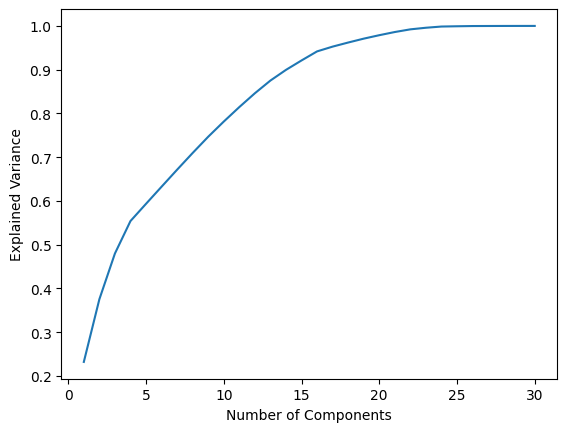

In [ ]:
from sklearn.decomposition import PCA

explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

plt.figure()
plt.plot(range(1, len(explained_variance) + 1), cumulative_variance)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')

In [ ]:
x_train,x_test, y_train,y_test = train_test_split(X,y,test_size=0.3)

model = Sequential()

#Eingabelayer mit Anzahl der Features als Neuronen
model.add(Dense(x_train.shape[1]))

#Verstecktes Layer
model.add(Dense(100,activation='relu'))

model.add(Dense(50,activation='sigmoid'))


#Outputlayer mit einem Neuronen
model.add(Dense(1))


model.compile(optimizer=Adam(0.001), loss='mse')
#x_train = np.asarray(x_train).astype(np.float)
#y_train = np.asarray(y_train).astype(np.float)

r = model.fit(x_train, y_train,
              validation_data=(x_test,y_test),
              batch_size=100,
              epochs=1000)
yn_train_pred = model.predict(x_train)
yn_test_pred = model.predict(x_test)

print('Trainingsdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_train, yn_train_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_train, yn_train_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_train, yn_train_pred))))
print('R2: ', metrics.r2_score(y_train, yn_train_pred))
print('')
print('Testdaten')
#print('MAE: ', inverse_min_max_scaler(metrics.mean_absolute_error(y_test, yn_test_pred)))
#print('MSE: ', inverse_min_max_scaler(metrics.mean_squared_error(y_test, yn_test_pred)))
print('RMSE: ', inverse_min_max_scaler(np.sqrt(metrics.mean_squared_error(y_test, yn_test_pred))))
print('R2: ', metrics.r2_score(y_test, yn_test_pred))

Epoch 1/1000
207/207 [==============================] - 2s 3ms/step - loss: 0.1068 - val_loss: 0.0043
Epoch 2/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0032 - val_loss: 0.0028
Epoch 3/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0025 - val_loss: 0.0024
Epoch 4/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 5/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 6/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0020 - val_loss: 0.0020
Epoch 7/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0019 - val_loss: 0.0019
Epoch 8/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 9/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.0018 - val_loss: 0.0018
Epoch 10/1000
207/207 [==============================] - 0s 2ms/step - loss: 0.001

Obwohl sich die Ergebnisse verbessert haben, nachdem die PCA auf die unabhängigen Variblen angewendet wurde, gab es keinen signifikanten Unterschied zwischen den Resultaten. Aber es ist auch zu merken, dass die Resultate des Modells mit PCA besser sind als das vorherige Modell.

## Predicting with Multi Layer Perceptron

In [ ]:
x_test[200]

array([ 8.90293650e-01, -8.17644689e-02, -2.19412928e-01, -4.38753714e-01,
       -1.92370373e-03, -1.76320643e-03,  6.51241892e-03,  3.79705156e-03,
        4.51858394e-02, -1.67592990e-02, -4.79445286e-01,  6.36335643e-01,
        6.29550784e-02,  6.35332633e-02, -1.29521237e-01,  1.39244999e-01,
       -3.69046323e-02, -5.02045850e-02,  1.19549671e-01,  1.11345197e-01,
        1.09746006e-01,  8.11889623e-02, -5.32619305e-01, -1.09313792e-01,
        1.53979667e-03, -1.22382713e-03, -1.18619695e-03,  6.58731434e-05,
        4.74519571e-03,  2.91213512e-03])

In [ ]:
y_test[200]

0.382716049382716

In [ ]:
# Iteration über einen zufälligen Bereich von Testdatenpunkten
for i in range(29, 34):
    #Umformen des einzelnen Datenpunkts für die Vorhersage in die erwartete Form
    single_data_point = x_test[i].reshape(1, -1)

    #Vorhersage mit dem Modell für den einzelnen Datenpunkt
    prediction = model.predict(single_data_point)

    #Ausgabe der abgeschätzten und eigentlichen Ergebnisse durch inverse Transformation
    print("Abgeschätzte Resultat von Model mit PCA:", inverse_min_max_scaler(prediction[0][0]))
    print("Eigentliche Resultat:", int(inverse_min_max_scaler(y_test[i]).round()))

1/1 [==============================] - 0s 25ms/step
Abgeschätzte Resultat von Model mit PCA: 554546.714425087
Eigentliche Resultat: 575000
1/1 [==============================] - 0s 21ms/step
Abgeschätzte Resultat von Model mit PCA: 642773.3933925629
Eigentliche Resultat: 684850
1/1 [==============================] - 0s 21ms/step
Abgeschätzte Resultat von Model mit PCA: 584563.4013414383
Eigentliche Resultat: 570000
1/1 [==============================] - 0s 23ms/step
Abgeschätzte Resultat von Model mit PCA: 696261.4798545837
Eigentliche Resultat: 660000
1/1 [==============================] - 0s 22ms/step
Abgeschätzte Resultat von Model mit PCA: 681402.2243022919
Eigentliche Resultat: 620000


## KNN Classifier

Accuracy of KNN: 0.77
                 precision    recall  f1-score   support

           Audi       0.78      0.79      0.79       244
            BMW       0.90      0.92      0.91       446
        Citroen       0.64      0.68      0.66       356
           Fiat       0.85      0.88      0.86       482
           Ford       0.66      0.72      0.69       512
          Honda       0.87      0.90      0.89       512
        Hyundai       0.83      0.80      0.81       532
Mercedes - Benz       0.88      0.87      0.87       349
           Opel       0.74      0.73      0.73       451
        Peugeot       0.65      0.65      0.65       460
           Seat       0.64      0.66      0.65       296
          Skoda       0.67      0.67      0.67       315
         Toyota       0.82      0.79      0.80       496
     Volkswagen       0.72      0.59      0.65       459

       accuracy                           0.77      5910
      macro avg       0.76      0.76      0.76      5910
   weig

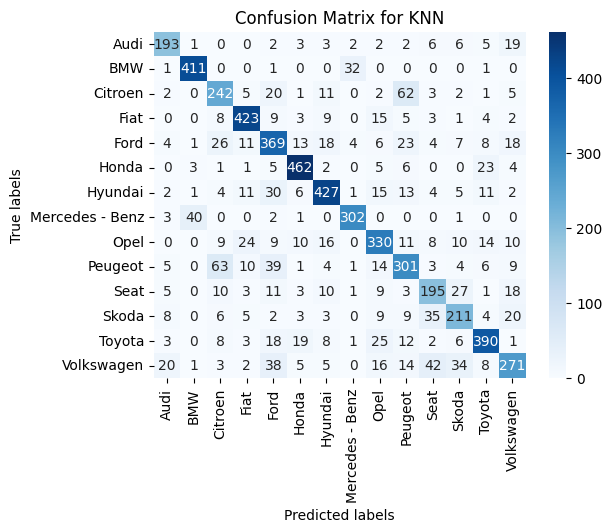

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.model_selection import train_test_split
# Auswahl der Features für X und y
X = df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV','Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum', "Preis"]] # Features für das Modell
y = df['Marke']  # Zielvariable

# Initialisierung des KNeighborsClassifier Modells
knn = KNeighborsClassifier(n_neighbors=5)

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Anpassen des KNeighborsClassifier Modells an die Trainingsdaten
knn.fit(X_train, y_train)

# Vorhersage auf Basis der Testdaten
y_pred = knn.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy of KNN: {accuracy:.2f}")  # Genauigkeit des Modells

# Anzeige eines detaillierten Klassifikationsberichts
print(classification_report(y_test, y_pred))  # Klassifikationsbericht
cm = confusion_matrix(y_test, y_pred)

# Ausgabe der Confusion Matrix
class_names = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for KNN')
plt.show()

Das K-Neighbors-Classifier-Modell wurde angewendet, um Automarken basierend auf einer Vielzahl von Merkmalen zu klassifizieren. Die Analyse des Klassifikationsberichts zeigt eine differenzierte Leistung des Modells für verschiedene Automarken. Es konnte bestimmte Marken wie BMW, Fiat und Honda effektiv identifizieren, während es bei anderen Marken wie Seat und Skoda weniger genau war.

Die Gesamtgenauigkeit des Modells beträgt 0,74, mit 10 nachbarn und 0.77 mit 5 nachbarn was auf eine moderate Vorhersageleistung hinweist. Es ist jedoch wichtig zu beachten, dass diese Genauigkeit je nach Automarke variiert. Diese Varierungen könnten durch die Confusion-Matrix beobachtet werden.

## Decision Tree Classifier

Accuracy Decision Tree Classifier: 0.93
                 precision    recall  f1-score   support

           Audi       0.86      0.86      0.86       244
            BMW       0.98      0.98      0.98       446
        Citroen       0.87      0.84      0.86       356
           Fiat       0.96      0.97      0.97       482
           Ford       0.97      0.96      0.97       512
          Honda       0.99      0.98      0.98       512
        Hyundai       0.97      0.98      0.97       532
Mercedes - Benz       0.97      0.97      0.97       349
           Opel       0.96      0.95      0.95       451
        Peugeot       0.87      0.89      0.88       460
           Seat       0.81      0.81      0.81       296
          Skoda       0.80      0.85      0.82       315
         Toyota       0.98      0.98      0.98       496
     Volkswagen       0.88      0.88      0.88       459

       accuracy                           0.93      5910
      macro avg       0.92      0.92      0.92

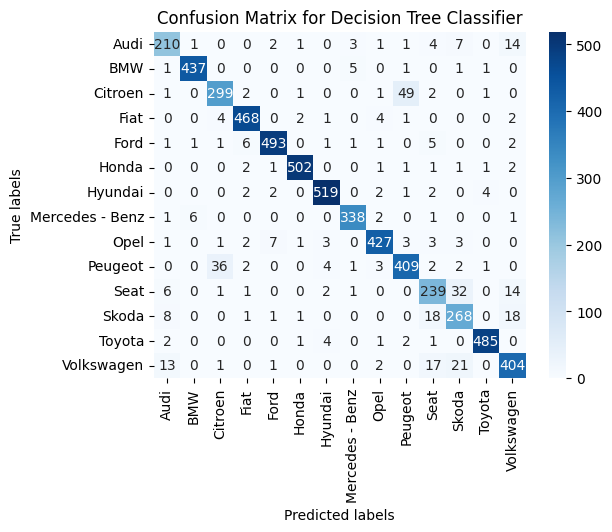

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X = df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV','Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum', "Preis"]] # Features für das Modell
y = df['Marke']  # Zielvariable
# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des DecisionTreeClassifier Modells
clf = DecisionTreeClassifier(random_state=42)

# Anpassen des DecisionTreeClassifier Modells an die Trainingsdaten
clf.fit(X_train, y_train)

# Vorhersage auf Basis der Testdaten
y_pred = clf.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Decision Tree Classifier: {accuracy:.2f}")  # Genauigkeit des Modells
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)

# Ausgabe der Confusion Matrix
class_names = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

plt.figure(figsize=(6, 4.5))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

Das Decision Tree Classifier-Modell wurde angewendet, um Automarken basierend auf einer Vielzahl von Merkmalen zu klassifizieren. Die Analyse des Klassifikationsberichts zeigt eine bemerkenswert gute Leistung des Modells für die meisten Automarken. Besonders hervorzuheben ist die hohe Genauigkeit bei der Vorhersage von BMW, Honda und Toyota.

Die Gesamtgenauigkeit des Modells beträgt hervorragende 0,93, was auf eine sehr präzise Vorhersageleistung hinweist. Die Precision, Recall und F1-Score für die meisten Klassen sind ebenfalls hoch, was darauf hindeutet, dass das Modell die meisten Automarken gut vorhersagen kann.

Diese hohe Genauigkeit und Zuverlässigkeit in der Vorhersage könnten das Decision Tree Classifier-Modell zu einer ausgezeichneten Wahl für die Klassifizierung von Automarken machen. Es könnte jedoch die Lage sein, dass sich das Model überanpasst. Deshalb wird der Random-Forest Klassifizer benutzt um die Überanpassungen zu vermeiden.

## Random Forest

Accuracy of Random Forest: 0.94

Classification Report:
                 precision    recall  f1-score   support

           Audi       0.90      0.90      0.90       244
            BMW       0.98      0.99      0.98       446
        Citroen       0.88      0.87      0.87       356
           Fiat       0.96      0.97      0.97       482
           Ford       0.98      0.96      0.97       512
          Honda       0.99      0.98      0.98       512
        Hyundai       0.98      0.98      0.98       532
Mercedes - Benz       0.97      0.97      0.97       349
           Opel       0.94      0.97      0.96       451
        Peugeot       0.89      0.88      0.89       460
           Seat       0.80      0.83      0.81       296
          Skoda       0.84      0.82      0.83       315
         Toyota       0.98      0.98      0.98       496
     Volkswagen       0.89      0.88      0.88       459

       accuracy                           0.94      5910
      macro avg       0.93    

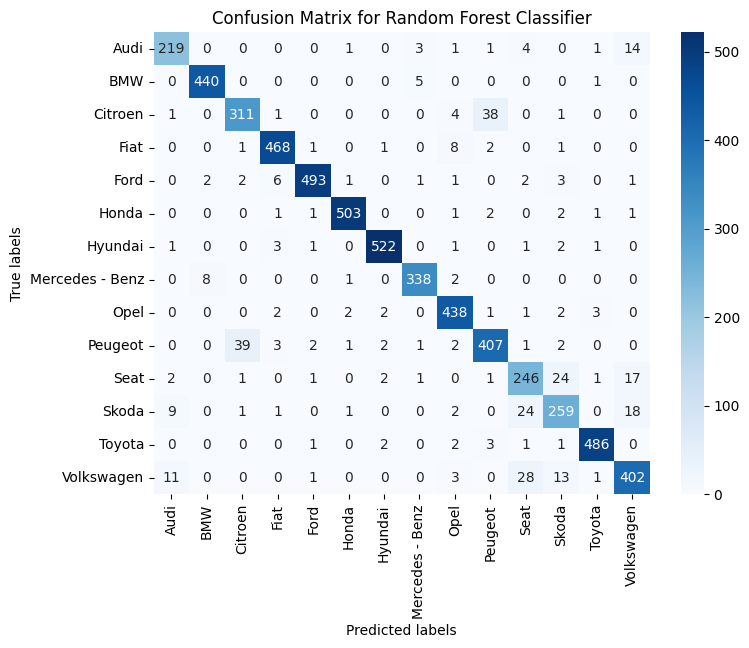

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
# Auswahl der Features für X und y
X = df[["Getriebetyp_Düz", 'Getriebetyp_Otomatik', 'Getriebetyp_Yarı Otomatik',
        'Karosserieart_Cabrio', 'Karosserieart_Coupe', 'Karosserieart_Hatchback/3',
        'Karosserieart_MPV','Karosserieart_Roadster', 'Karosserieart_SUV',
        'Karosserieart_Sedan','Karosserieart_Station wagon',
       'Antrieb_4WD (Sürekli)', 'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş','Alter', 'Kilometer',
       'Durchschnittlicher Kraftstoffverbrauch', 'Motorleistung',
       'Motorhubraum', "Preis"]] # Features für das Modell

y = df['Marke']  # Zielvariable

# Aufteilung der Daten in Trainings- und Testsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialisierung des RandomForestClassifier Modells mit 100 Bäumen
random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Anpassen des RandomForestClassifier Modells an die Trainingsdaten
random_forest.fit(X_train, y_train)

# Vorhersage auf Basis der Testdaten
predictions = random_forest.predict(X_test)

# Auswertung der Genauigkeit des Modells
accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy of Random Forest: {accuracy:.2f}")  # Genauigkeit des Modells

# Ausgabe des Klassifikationsberichts
print("\nClassification Report:")
print(classification_report(y_test, predictions))


cm = confusion_matrix(y_test, predictions)

# Ausgabe der Confusion Matrix
class_names = ['Audi', 'BMW', 'Citroen', 'Fiat', 'Ford', 'Honda', 'Hyundai',
       'Mercedes - Benz', 'Opel', 'Peugeot', 'Seat', 'Skoda', 'Toyota',
       'Volkswagen']

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

Das Random Forest-Modell wurde angewendet, um Automarken auf Basis verschiedener Merkmale zu klassifizieren. Die Analyse des Klassifikationsberichts zeigt eine herausragende Leistung des Modells für die meisten Automarken. Besonders hervorzuheben ist die hohe Genauigkeit bei der Vorhersage von BMW, Honda, Toyota und Hyundai.

Die Gesamtgenauigkeit des Modells beträgt bemerkenswerte 0,90, wenn es nur 5 sub-bäume gibt und 0.93 wenn es 25 sub-bäume gibt. Dann wurde 100 Estimators angewendet. Obwohl die Genauigkeit nicht abnimmt, wenn die Anzahl der Teilbäume 100 überschreitet, wurde keine Verbesserung beobachtet Diese Bewertungen hinweißen auf eine äußerst präzise Vorhersageleistung. Die Precision, Recall und F1-Score für die meisten Klassen sind ebenfalls hoch, was darauf hindeutet, dass das Modell die meisten Automarken sehr gut vorhersagen kann.

Das Random Forest-Modell zeigt eine ähnlich hohe Leistung wie der Decision Tree Classifier, wobei es tendenziell etwas bessere Ergebnisse in Bezug auf Precision, Recall und F1-Score liefert. Es ist eine vielversprechende Wahl für die Klassifizierung von Automarken und könnte aufgrund seiner Präzision und Robustheit eine gute Option für präzise Vorhersagen sein.

In [ ]:
X_test.columns

Index(['Karosserieart_Cabrio', 'Karosserieart_Coupe',
       'Karosserieart_Hatchback/3', 'Karosserieart_MPV',
       'Karosserieart_Roadster', 'Karosserieart_SUV', 'Karosserieart_Sedan',
       'Karosserieart_Station wagon', 'Antrieb_4WD (Sürekli)',
       'Antrieb_AWD (Elektronik)', 'Antrieb_Arkadan İtiş',
       'Antrieb_Önden Çekiş', 'Alter', 'Kilometer', 'Kraftstoffeffizienz',
       'Motorhubraum', 'Preis'],
      dtype='object')

## Comparing the Random Forest and Decision Tree classifier in an empirical way

In [ ]:
for i in range(20, 30):
    new_data_point = [X_test.iloc[i]]
    predicted_class = clf.predict(new_data_point)
    predicted_class1 = random_forest.predict(new_data_point)
    actual_class = y_test.iloc[i]
    print("Predicted class label for Decision Tree:", predicted_class)
    print("Predicted class label for Random Forest:", predicted_class1)
    print("Actual class label for: ", actual_class)

Predicted class label for Decision Tree: ['Skoda']
Predicted class label for Random Forest: ['Skoda']
Actual class label for:  Skoda
Predicted class label for Decision Tree: ['Ford']
Predicted class label for Random Forest: ['Ford']
Actual class label for:  Ford
Predicted class label for Decision Tree: ['Citroen']
Predicted class label for Random Forest: ['Citroen']
Actual class label for:  Citroen
Predicted class label for Decision Tree: ['BMW']
Predicted class label for Random Forest: ['BMW']
Actual class label for:  BMW
Predicted class label for Decision Tree: ['Toyota']
Predicted class label for Random Forest: ['Toyota']
Actual class label for:  Toyota
Predicted class label for Decision Tree: ['Mercedes - Benz']
Predicted class label for Random Forest: ['Mercedes - Benz']
Actual class label for:  Mercedes - Benz
Predicted class label for Decision Tree: ['Peugeot']
Predicted class label for Random Forest: ['Citroen']
Actual class label for:  Citroen
Predicted class label for Decisio

C:\Users\Haluk\Desktop\jblab\juplab3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Haluk\Desktop\jblab\juplab3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Haluk\Desktop\jblab\juplab3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Haluk\Desktop\jblab\juplab3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
C:\Users\Haluk\Desktop\jblab\juplab3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
